In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from scipy import stats
from sklearn.model_selection import StratifiedKFold
%matplotlib inline

Link to data: https://www.kaggle.com/zalando-research/fashionmnist/data

In [0]:
data = pd.read_csv('data/fashion-mnist_test.csv')

In [0]:
data.shape

(10000, 785)

In [0]:
data.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      0       0       0       0       0       0       0       0       9   
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0      14      53   
3      2       0       0       0       0       0       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel775  pixel776  pixel777  pixel778  pixel779  \
0       8    ...          103        87        56         0         0   
1       0    ...           34         0         0         0         0   
2      99    ...            0         0         0         0        63   
3       0    ...          137       126       140         0       133   
4       0    ...            0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0         0  
1         0         0         0         0         0  
2        53        31         0         0         0  
3       224       222        56         0         0  
4         0         0         0         0         0  

[5 rows x 785 columns]

In [0]:
# type conversion for optimized storage
for c in data.columns:
    data.loc[:, c] = data[c].astype(np.uint8)

In [0]:
# features and target
x, y = data.drop('label', axis=1).values, data['label']

### Single holdout: Varying test size

In [0]:
# varying hold out size
test_size = np.arange(0.05, 0.55, 0.05)

trn_accuracy = []
tst_accuracy = []

for sz in test_size:
    #stratified sampling
    sss = StratifiedShuffleSplit(n_splits=1, test_size=sz, random_state=0)

    #train-test split
    for trn_idx, tst_idx in sss.split(x, y):
        x_trn, y_trn, x_tst, y_tst = x[trn_idx], y[trn_idx], x[tst_idx], y[
            tst_idx]

    #model fitting
    clf = RandomForestClassifier(random_state=0, min_samples_leaf=3)
    clf.fit(x_trn, y_trn)

    #model prediction
    pred_tst = clf.predict(x_tst)
    pred_trn = clf.predict(x_trn)

    #perfromance evaluation
    tst_accuracy.append(accuracy_score(y_tst, pred_tst))
    trn_accuracy.append(accuracy_score(y_trn, pred_trn))

In [0]:
# 95% CI calculation using normal approximation method
ui = []
li = []
for i, n in enumerate(test_size):
    p = tst_accuracy[i]
    sigma = np.sqrt(p * (1 - p) / (n * 10000))
    ui.append(p + 1.96 * sigma)
    li.append(p - 1.96 * sigma)

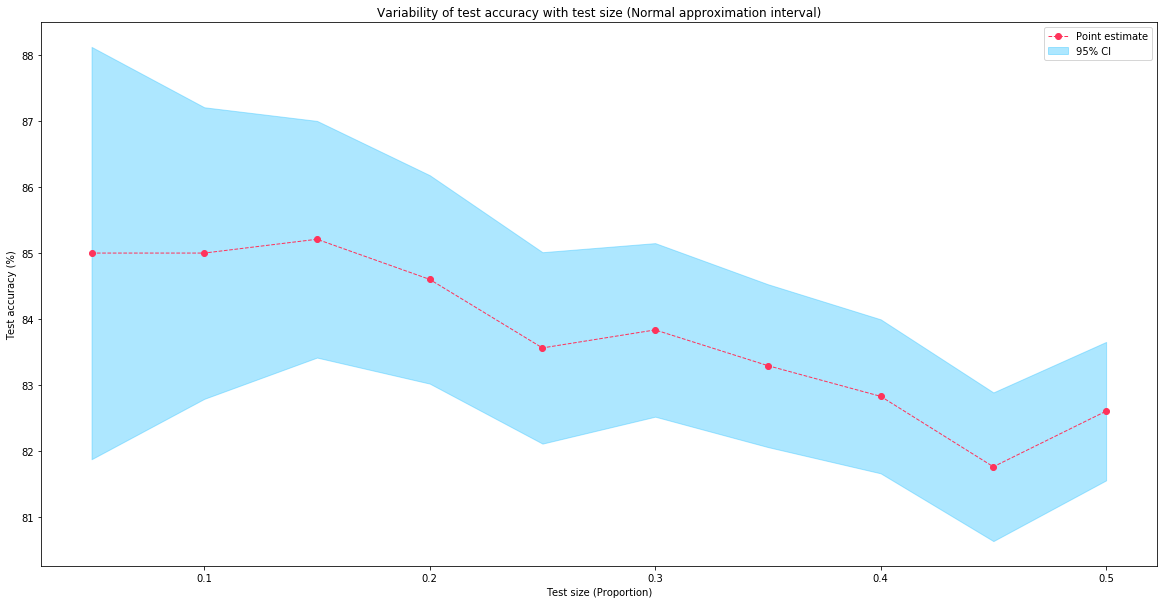

In [0]:
#CI plot
def lineplotCI(x_data, y_data, low_CI, upper_CI, x_label, y_label, title):
    # Create the plot object
    _, ax = plt.subplots(figsize=(20, 10))
    # Plot the data, set the linewidth, color and transparency of the
    # line, provide a label for the legend
    ax.plot(
        x_data,
        y_data,
        lw=1,
        color='#FF335B',
        alpha=1,
        label='Point estimate',
        linestyle='--',
        marker='o')
    # Shade the confidence interval
    ax.fill_between(
        x_data, low_CI, upper_CI, color='#33C4FF', alpha=0.4, label='95% CI')
    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    # Display legend
    ax.legend(loc='best')


# Call the function to create plot
lineplotCI(
    x_data=test_size,
    y_data=100 * np.array(tst_accuracy),
    low_CI=100 * np.array(li),
    upper_CI=100 * np.array(ui),
    x_label='Test size (Proportion)',
    y_label='Test accuracy (%)',
    title=
    'Variability of test accuracy with test size (Normal approximation interval)'
)

### Repeated holdout

In [0]:
test_size = 0.1
# repeating for 50 different seeds
seed = np.random.randint(0, 1000, 50)
trn_accuracy_1 = []
tst_accuracy_1 = []
for state in seed:
    sss = StratifiedShuffleSplit(
        n_splits=1, test_size=test_size, random_state=state)

    for trn_idx, tst_idx in sss.split(x, y):
        x_trn, y_trn, x_tst, y_tst = x[trn_idx], y[trn_idx], x[tst_idx], y[
            tst_idx]

    clf = RandomForestClassifier(random_state=0, min_samples_leaf=3)

    clf.fit(x_trn, y_trn)

    pred_tst = clf.predict(x_tst)
    pred_trn = clf.predict(x_trn)

    tst_accuracy_1.append(accuracy_score(y_tst, pred_tst))
    trn_accuracy_1.append(accuracy_score(y_trn, pred_trn))

In [0]:
test_size = 0.5
seed = np.random.randint(0, 1000, 50)
trn_accuracy_2 = []
tst_accuracy_2 = []
for state in seed:
    sss = StratifiedShuffleSplit(
        n_splits=1, test_size=test_size, random_state=state)

    for trn_idx, tst_idx in sss.split(x, y):
        x_trn, y_trn, x_tst, y_tst = x[trn_idx], y[trn_idx], x[tst_idx], y[
            tst_idx]

    clf = RandomForestClassifier(random_state=0, min_samples_leaf=3)

    clf.fit(x_trn, y_trn)

    pred_tst = clf.predict(x_tst)
    pred_trn = clf.predict(x_trn)

    tst_accuracy_2.append(accuracy_score(y_tst, pred_tst))
    trn_accuracy_2.append(accuracy_score(y_trn, pred_trn))

In [0]:
df = pd.DataFrame()

df['0.1'] = tst_accuracy_1

df['0.5'] = tst_accuracy_2

df['seed'] = df.index

Text(0,0.5,'Test accuracy (%)')

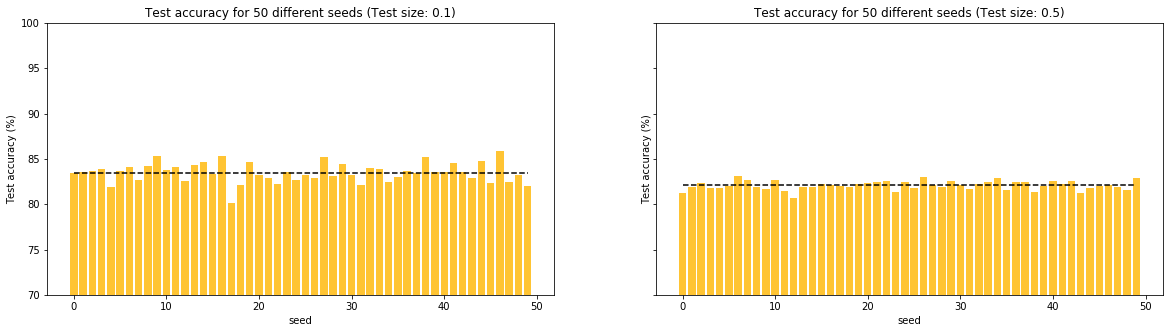

In [0]:
# plotting accuracy score for 50 different iterations
_, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
axes[0].bar(df.seed, 100 * df['0.1'], color='#FFC433')
axes[0].plot(df.seed, [100 * np.mean(df['0.1'])] * df.shape[0], "k--")
axes[0].set_title("Test accuracy for 50 different seeds (Test size: 0.1)")
axes[1].bar(df.seed, 100 * df['0.5'], color='#FFC433')
axes[1].plot(df.seed, [100 * np.mean(df['0.5'])] * df.shape[0], "k--")
axes[1].set_title("Test accuracy for 50 different seeds (Test size: 0.5)")
plt.ylim([70, 100])
axes[0].set_xlabel("seed")
axes[0].set_ylabel("Test accuracy (%)")
axes[1].set_xlabel("seed")
axes[1].set_ylabel("Test accuracy (%)")

In [0]:
print(f"Mean accuracy for test size (0.1): {100*np.mean(df['0.1'])}")

Mean accuracy for test size (0.1): 83.492


In [0]:
print(f"Mean accuracy for test size (0.5): {100*np.mean(df['0.5'])}")

Mean accuracy for test size (0.5): 82.0828


### k-fold cross validation

In [0]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
folds_score = []
for trn_idx, tst_idx in skf.split(x, y):
    x_trn, y_trn, x_tst, y_tst = x[trn_idx], y[trn_idx], x[tst_idx], y[tst_idx]
    clf = RandomForestClassifier(random_state=0, min_samples_leaf=3)

    clf.fit(x_trn, y_trn)

    pred_tst = clf.predict(x_tst)

    folds_score.append(accuracy_score(y_tst, pred_tst))

mean_accuracy = np.mean(folds_score)

std_accuracy = np.std(folds_score)

mean_accuracy,std_accuracy

(0.8337, 0.004696807426326978)

In [0]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
folds_score = []
for trn_idx, tst_idx in skf.split(x, y):
    x_trn, y_trn, x_tst, y_tst = x[trn_idx], y[trn_idx], x[tst_idx], y[tst_idx]
    clf = RandomForestClassifier(random_state=0, min_samples_leaf=3)

    clf.fit(x_trn, y_trn)

    pred_tst = clf.predict(x_tst)

    folds_score.append(accuracy_score(y_tst, pred_tst))

mean_accuracy = np.mean(folds_score)

std_accuracy = np.std(folds_score)

mean_accuracy,std_accuracy

(0.8347, 0.009000555538409845)